In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
print("(Number of 'pictures', Pixels per image)")
print(digits.data.shape)

(Number of 'pictures', Pixels per image)
(1797, 64)


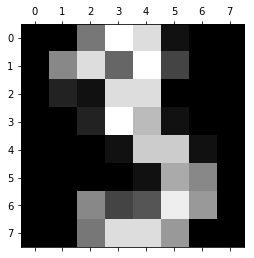

In [19]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[3]) 
plt.show() 

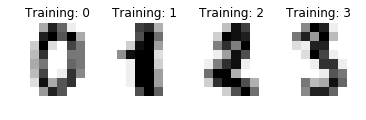

In [20]:
images_and_labels = list(zip(digits.images, digits.target))


for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

plt.show()

In [31]:
# flatten the image.
# turn the data into a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
#split into test and training
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)
reg = LogisticRegression(solver = 'lbfgs')
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

conf = confusion_matrix(y_test, prediction)
print("Confusion Matrix")
print(conf)
#From what i understand SKlearn orders columns in ascending order, so the order of the confusion matrix is as follows:
#0, 1, 2, 3, 4, 5, 6, 7, 8, 9

Confusion Matrix
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  1  0  4  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  1  2  1]
 [ 0  1  0  0 30  0  0  0  0  0]
 [ 0  2  0  0  0 41  2  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  1 28]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.86      0.86      0.86        35
          2       1.00      1.00      1.00        27
          3       1.00      0.90      0.95        40
          4       1.00      0.97      0.98        31
          5       1.00      0.91      0.95        45
          6       0.93      1.00      0.96        37
          7       0.97      1.00      0.99        39
          8       0.82      0.94      0.88        34
          9       0.97      0.97      0.97        29

avg / total       0.96      0.95      0.95       360



## Questions

### Which digits are most often confused by the model? 

The digit that was most often confused was; there were four instances where a one was displayed but an 8 was predicted. There was also 2 cases where 8 was shown but one was predicted. I am not really sure why this would have been the case, i know 1 can be drawn a lot of different ways but im not sure why this would have been the case.

### What is the accuracy of the model? 

The precision column of the table rated this model as being 96% accurate. I was really suprised by this as compared to previous models that we've attempted in class.

### Which digits are most often reognized correctly? 

The digits 0, and 2, came in as 100% accurate, being both predicted and guessed right every time. 4 and 5 were very accurate as well though not perfect.

### Which are recognized incorrectly?

The digits 8 and 1 seemed to be predicted falsely the most. If i had to guess offhand what digits would be guessed wrong the most, i wouldn't have guessed 8, so it somewhat shocked me when 8 and one were mixed up so much. This compounds my confusion since the other digits were predicted so acuratly. Something i would like to see in the future would be the actual images from the incorrectly guessed data so i can possibly see why these digits were predicted so wrong.

## Afterthoughts

My one question with this model is, what could be done to increase the accuracy of the model for future runs?
How might i adapt this code to be able to read numbers with more than one digit in the picture?